In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=dd647c057dab26d82796e285f749bf5df092bdf43fca8c7d21889ed4f48bc6c7
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
pip install pyspark_dist_explore


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from pyspark.sql.functions import isnan, count, when
from pyspark.sql.functions import col
from pyspark.sql.functions import skewness, log
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler, MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.stat import Correlation
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
import plotly.express as px
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
from scipy import stats
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.sql.functions import abs
from pyspark.ml.regression import RandomForestRegressor
from pyspark.sql.functions import abs
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import abs
from pyspark.sql.functions import avg, col
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# 2. Data Visualization and Exploration

In [62]:
spark = SparkSession.builder.appName('diamonds').getOrCreate()

diamonds_df = spark.read.format('csv').options(header='true', inferSchema='true').load('/content/diamonds.csv')

###  2.a First 20 rows for sanity chack

In [ ]:
diamonds_df.show()


+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|  1| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
|  2| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
|  3| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
|  4| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
|  5| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
|  6| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
|  7| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
|  8| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
|  9| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 10| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
| 11|  0.3|     Good|    J|    SI1| 64.0| 55.0|  339|4.25|4.28|2.73|
| 12| 0.23|    Ideal|    J|    VS1

2.b) Description of the dataset

In [ ]:
diamonds_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



### Shape of the dataset

In [ ]:
print("Number of rows: ", diamonds_df.count())
print("Number of columns: ", len(diamonds_df.columns))

Number of rows:  53940
Number of columns:  11


## 2.c) Visualization

In [63]:
df1 = pd.read_csv("/content/diamonds.csv")
df1

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

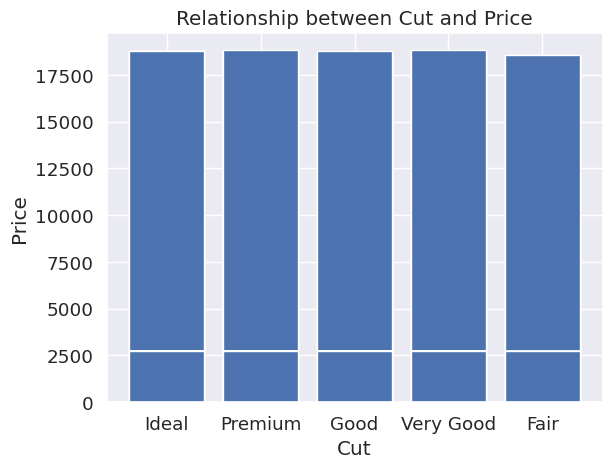

In [ ]:
# draw bar graph using matplotlib
plt.bar(df1["cut"], df1["price"])
plt.title("Relationship between Cut and Price")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

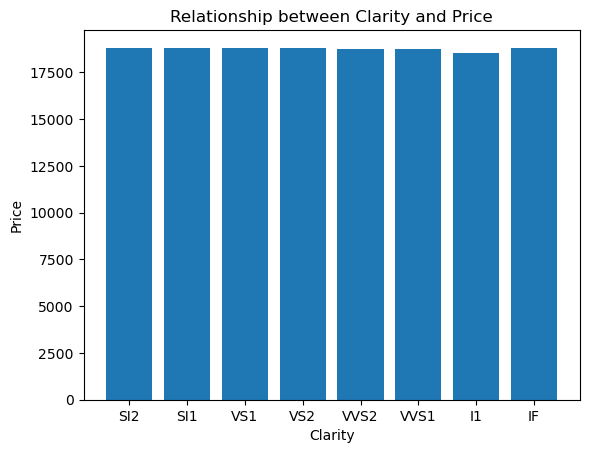

In [ ]:
plt.bar(df1["clarity"], df1["price"])
plt.title("Relationship between Clarity and Price")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

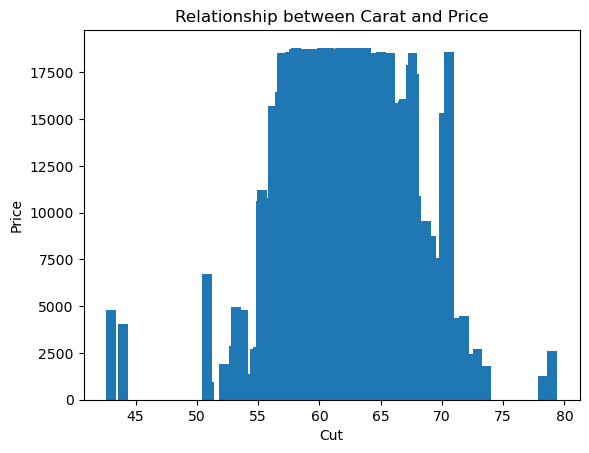

In [ ]:
plt.bar(df1["cut"], df1["price"])
plt.title("Relationship between Carat and Price")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

In [64]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [65]:
import matplotlib.pyplot as plt
fig = px.box(df1, x="carat", y="price", width=800, height=400,
             labels={"carat": "Carat Count", "price": "Price ($)"},
             title="Box Plot of Diamond Prices by Carat Count")
fig.show()

In [66]:
fig = px.box(df1, y="cut", width=800, height=400, # creating box plot for life expectancy
            labels={"Cut_count"})
fig.show()

In [67]:
fig = px.box(df1, y="color", width=800, height=400, # creating box plot for life expectancy
            labels={"Colour_count"})
fig.show()

In [68]:
fig = px.box(df1, y="clarity", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [69]:
fig = px.box(df1, y="depth", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [70]:
fig = px.box(df1, y="table", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [71]:
fig = px.box(df1, y="price", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [72]:
fig = px.box(df1, y="x", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [73]:
fig = px.box(df1, y="y", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

In [74]:
fig = px.box(df1, y="z", width=800, height=400, # creating box plot for life expectancy
            labels={"clarity_count"})
fig.show()

2.d) Mostly box plot is used to see if there is any outliers present in the dataset. The above images suggest that there is outliers present in most of the columns. And also it clearly depicts that some of the features show skewness in the dataset.

# 3. Data pre-processing and cleaning

### 3.a) Checking for the missing values present in the data

In [ ]:
diamonds_df.select([count(when(isnan(c) | diamonds_df[c].isNull(), c)).alias(c) for c in diamonds_df.columns]).show()

+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|_c0|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|  0|    0|  0|    0|      0|    0|    0|    0|  0|  0|  0|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+



### Hence no missing values are there, we can now deal with the outliers

In [ ]:
# Here we use IQR to find the outliers present in the dataset and we remove all the outliers 
#which comes more and less than the IQR range 

quantiles = diamonds_df.approxQuantile(['carat', 'depth', 'table', 'price'], [0.25, 0.75], 0)

iqr_dict = {}

for i, col_name in enumerate(['carat', 'depth', 'table', 'price']):
    q1, q3 = quantiles[i]
    iqr = q3 - q1
    iqr_dict[col_name] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

diamonds_df = diamonds_df.filter((col('carat').between(iqr_dict['carat'][0], iqr_dict['carat'][1])) &
                                 (col('depth').between(iqr_dict['depth'][0], iqr_dict['depth'][1])) &
                                 (col('table').between(iqr_dict['table'][0], iqr_dict['table'][1])) &
                                 (col('price').between(iqr_dict['price'][0], iqr_dict['price'][1])))


### 3.b) Feature Engineering

### Checking for the skewness in the dataset

In [ ]:


skewed_cols = ['carat', 'depth', 'table', 'price']
for col_name in skewed_cols:
    print(f"Skewness of {col_name}: {diamonds_df.agg(skewness(col(col_name))).collect()[0][0]}")

diamonds_df = diamonds_df.withColumn('log_price', log(col('price')))


Skewness of carat: 0.6891361092649995
Skewness of depth: -0.24366033081620442
Skewness of table: 0.3882797344055961
Skewness of price: 1.2012618397233656


### As we can see the skewness present in the dataset, we can deal with them using feature scaling

In [ ]:
num_cols = ['carat', 'depth', 'table', 'log_price']

diamonds_num_df = diamonds_df.select(num_cols)


## Standardization

In [ ]:


# combine numeric columns into a vector column
assembler = VectorAssembler(inputCols=['carat', 'depth', 'table'], outputCol='features')
diamonds_vec_df = assembler.transform(diamonds_num_df)

# apply standard scaling to the vector column
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withMean=True, withStd=True)
scaled_df = scaler.fit(diamonds_vec_df).transform(diamonds_vec_df)

# show the resulting DataFrame
scaled_df.show()


+-----+-----+-----+------------------+----------------+--------------------+
|carat|depth|table|         log_price|        features|     scaled_features|
+-----+-----+-----+------------------+----------------+--------------------+
| 0.23| 61.5| 55.0| 5.786897381366708|[0.23,61.5,55.0]|[-1.2901252860684...|
| 0.21| 59.8| 61.0| 5.786897381366708|[0.21,59.8,61.0]|[-1.3440187488296...|
| 0.29| 62.4| 58.0|   5.8111409929767|[0.29,62.4,58.0]|[-1.1284448977851...|
| 0.31| 63.3| 58.0| 5.814130531825066|[0.31,63.3,58.0]|[-1.0745514350240...|
| 0.24| 62.8| 57.0| 5.817111159963204|[0.24,62.8,57.0]|[-1.2631785546879...|
| 0.24| 62.3| 57.0| 5.817111159963204|[0.24,62.3,57.0]|[-1.2631785546879...|
| 0.26| 61.9| 55.0| 5.820082930352362|[0.26,61.9,55.0]|[-1.2092850919268...|
| 0.23| 59.4| 61.0| 5.823045895483019|[0.23,59.4,61.0]|[-1.2901252860684...|
|  0.3| 64.0| 55.0|  5.82600010738045| [0.3,64.0,55.0]|[-1.1014981664045...|
| 0.23| 62.8| 56.0|5.8289456176102075|[0.23,62.8,56.0]|[-1.2901252860684...|

## Normalization

In [ ]:


# combine numeric columns into a vector column
assembler = VectorAssembler(inputCols=['carat', 'depth', 'table'], outputCol='features')
diamonds_vec_df = assembler.transform(diamonds_num_df)

# apply min-max scaling to the vector column
normalizer = MinMaxScaler(inputCol='features', outputCol='normalized_features')
normalized_df = normalizer.fit(diamonds_vec_df).transform(diamonds_vec_df)

# show the resulting DataFrame
normalized_df.show()



+-----+-----+-----+------------------+----------------+--------------------+
|carat|depth|table|         log_price|        features| normalized_features|
+-----+-----+-----+------------------+----------------+--------------------+
| 0.23| 61.5| 55.0| 5.786897381366708|[0.23,61.5,55.0]|[0.01666666666666...|
| 0.21| 59.8| 61.0| 5.786897381366708|[0.21,59.8,61.0]|[0.00555555555555...|
| 0.29| 62.4| 58.0|   5.8111409929767|[0.29,62.4,58.0]|[0.04999999999999...|
| 0.31| 63.3| 58.0| 5.814130531825066|[0.31,63.3,58.0]|[0.06111111111111...|
| 0.24| 62.8| 57.0| 5.817111159963204|[0.24,62.8,57.0]|[0.02222222222222...|
| 0.24| 62.3| 57.0| 5.817111159963204|[0.24,62.3,57.0]|[0.02222222222222...|
| 0.26| 61.9| 55.0| 5.820082930352362|[0.26,61.9,55.0]|[0.03333333333333...|
| 0.23| 59.4| 61.0| 5.823045895483019|[0.23,59.4,61.0]|[0.01666666666666...|
|  0.3| 64.0| 55.0|  5.82600010738045| [0.3,64.0,55.0]|[0.05555555555555...|
| 0.23| 62.8| 56.0|5.8289456176102075|[0.23,62.8,56.0]|[0.01666666666666...|

In [ ]:
# create a new DataFrame with the same schema as the original DataFrame
# diamonds_df1 = spark.createDataFrame([], schema=diamonds_df.schema)

# copy the data from the original DataFrame to the new DataFrame
# diamonds_df1 = diamonds_df1.union(diamonds_df)

# 3.c) Correlation Analysis

### Checking the correlation value for every column

In [ ]:
# select the columns for the correlation analysis
corr_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
diamonds_df.corr('carat', 'price')

0.9215913011934687

In [ ]:
diamonds_df.corr('depth', 'price')

-0.0106474045841554

In [ ]:
diamonds_df.corr('table', 'price')

0.13677049945347244

In [ ]:
diamonds_df.corr('x', 'price')

0.8984932416536571

In [ ]:
diamonds_df.corr('y', 'price')

0.8930157496410099

In [ ]:
diamonds_df.corr('z', 'price')

0.8727788246605465

In [ ]:
vector_assembler = VectorAssembler(inputCols=corr_cols, outputCol='features')
assembled_df = vector_assembler.transform(diamonds_df).select('features')
corr_matrix = Correlation.corr(assembled_df, 'features').head()
print(str(corr_matrix[0]))

DenseMatrix([[ 1.        ,  0.0358645 ,  0.1874282 ,  0.92287867,  0.98470742,
               0.97659748,  0.95804083],
             [ 0.0358645 ,  1.        , -0.24003602,  0.00612139, -0.01130959,
              -0.01289197,  0.09033389],
             [ 0.1874282 , -0.24003602,  1.        ,  0.1367705 ,  0.18631819,
               0.17885294,  0.15338081],
             [ 0.92287867,  0.00612139,  0.1367705 ,  1.        ,  0.89849324,
               0.89301575,  0.87277882],
             [ 0.98470742, -0.01130959,  0.18631819,  0.89849324,  1.        ,
               0.99030683,  0.96774072],
             [ 0.97659748, -0.01289197,  0.17885294,  0.89301575,  0.99030683,
               1.        ,  0.96142478],
             [ 0.95804083,  0.09033389,  0.15338081,  0.87277882,  0.96774072,
               0.96142478,  1.        ]])


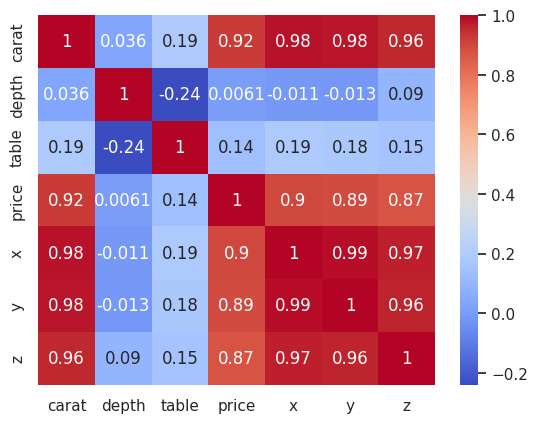

In [ ]:


# Select the columns to include in the correlation matrix
corr_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Convert string columns to numeric types
diamonds_df = diamonds_df.select([col(c).cast('double').alias(c) if c in corr_cols else col(c) for c in diamonds_df.columns])

# Compute the correlation matrix
corr_matrix = diamonds_df.select(corr_cols).toPandas().corr()

# Plot the heatmap
sns.set()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_cols, yticklabels=corr_cols)

# Show the plot
plt.show()



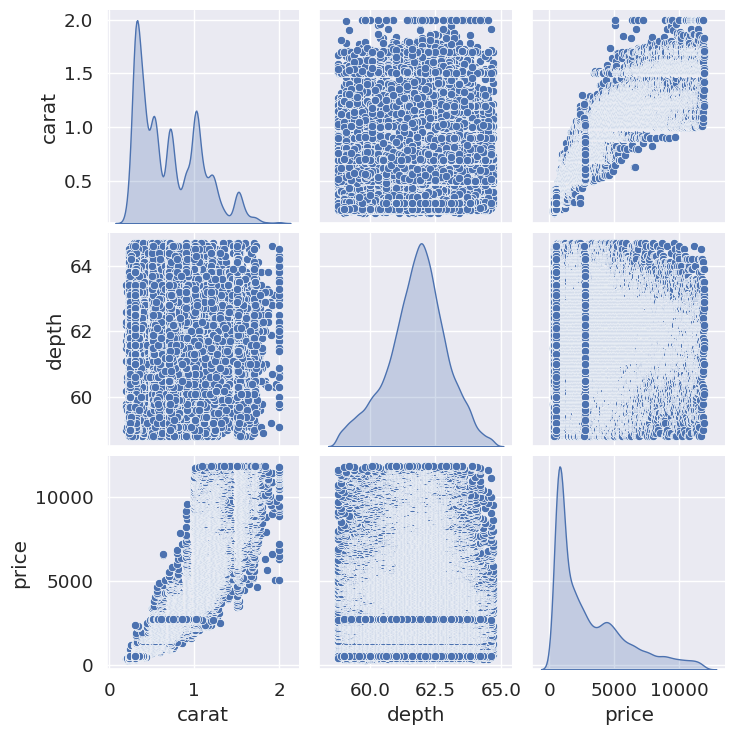

In [ ]:
scatter_cols = ['carat', 'depth', 'price']

sns.set(font_scale=1.2)
sns.pairplot(diamonds_df.select(scatter_cols).toPandas(), diag_kind='kde')
plt.show()


### we can observe a pattern between the columns carat & price and depth and price. We can observe some correlation between the columns.

# Data Preparation

In [ ]:
final_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'log_price']


### 4.a) Vector assembler help in combining all the feature in one column 

In [ ]:
#We now have combined the every feature in one column

assembler = VectorAssembler(inputCols=final_cols[:-1], outputCol='features')
data = assembler.transform(diamonds_df).select('features', 'log_price')


### 4.b) Splitting of the data

In [ ]:

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)


# 5. Model building

## Linear regression model

In [ ]:


# create a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='log_price', maxIter=10, regParam=0.3, elasticNetParam=0.8)

# fit the model to the training data
lr_model = lr.fit(train_data)

# make predictions on the test data
lr_predictions = lr_model.transform(test_data)


## Model validation

In [ ]:


# RMSE
lr_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="log_price", metricName="rmse").evaluate(lr_predictions)
print('Linear Regression Model - RMSE: {:.2f}'.format(lr_rmse))

# MSE        
lr_mse = RegressionEvaluator(predictionCol="prediction", labelCol="log_price", metricName="mse").evaluate(lr_predictions)
print('Linear Regression Model - MSE: {:.2f}'.format(lr_mse))

# MAPE
lr_mape = lr_predictions.select((abs(col('log_price') - col('prediction'))/col('log_price')).alias('mape')).agg(avg(col('mape')).alias('mape')).collect()[0]['mape'] * 100
print('Linear Regression Model - MAPE: {:.2f}%'.format(lr_mape))

# MAE
lr_mae = RegressionEvaluator(predictionCol="prediction", labelCol="log_price", metricName="mae").evaluate(lr_predictions)
print('Linear Regression Model - MAE: {:.2f}'.format(lr_mae))


Linear Regression Model - RMSE: 0.37
Linear Regression Model - MSE: 0.14
Linear Regression Model - MAPE: 3.98%
Linear Regression Model - MAE: 0.30


### The above values are close to zero, which shows that the Linear Regression model predictions are good. And the MAPE percentage is less, this adds that the model's predictions are good.

## Decision Tree Regression

In [ ]:


# create a Decision Tree Regression model
dt = DecisionTreeRegressor(featuresCol='features', labelCol='log_price', maxDepth=5)

# fit the model to the training data
dt_model = dt.fit(train_data)

# make predictions on the test data
dt_predictions = dt_model.transform(test_data)


## Model validation

In [ ]:


# calculate the RMSE, MSE, MAE, and MAPE for the Random Forest Regression model
dt_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='log_price', metricName='mse')
dt_mse = dt_evaluator.evaluate(dt_predictions)
dt_evaluator.setMetricName('rmse')
dt_rmse = dt_evaluator.evaluate(dt_predictions)

dt_mape = dt_predictions.select((abs(col('log_price') - col('prediction'))/col('log_price')).alias('mape')).agg(avg(col('mape')).alias('mape')).collect()[0]['mape'] * 100

dt_evaluator.setMetricName('mae')
dt_mae = dt_evaluator.evaluate(dt_predictions)

# print the evaluation metrics
print('Random Forest Regression Model - MSE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}, MAPE: {:.2f}%'.format(dt_mse, dt_rmse, dt_mae, dt_mape))


Random Forest Regression Model - MSE: 0.055, RMSE: 0.234, MAE: 0.185, MAPE: 2.45%


### The Decision Tree model is better than Linear Regression model. As the values are close to zero compared to the previous model

## Random Forest Model

In [ ]:


# create a Random Forest Regression model
rf = RandomForestRegressor(featuresCol='features', labelCol='log_price', numTrees=10, maxDepth=5)

# fit the model to the training data
rf_model = rf.fit(train_data)

# make predictions on the test data
rf_predictions = rf_model.transform(test_data)

## Model Validation

In [ ]:


# calculate the RMSE, MSE, MAE, and MAPE for the Random Forest Regression model
rf_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='log_price', metricName='mse')
rf_mse = rf_evaluator.evaluate(rf_predictions)
rf_evaluator.setMetricName('rmse')
rf_rmse = rf_evaluator.evaluate(rf_predictions)

rf_mape = rf_predictions.select((abs(col('log_price') - col('prediction'))/col('log_price')).alias('mape')).agg(avg(col('mape')).alias('mape')).collect()[0]['mape'] * 100

rf_evaluator.setMetricName('mae')
rf_mae = rf_evaluator.evaluate(rf_predictions)

# print the evaluation metrics
print('Random Forest Regression Model - MSE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}, MAPE: {:.2f}%'.format(rf_mse, rf_rmse, rf_mae, rf_mape))


Random Forest Regression Model - MSE: 0.054, RMSE: 0.233, MAE: 0.184, MAPE: 2.44%


## Both Decision Tree and Randon Forest metrice are nearly equal. But comparatively it is clear that Random forest model is better.

## Gradient Boosted Trees Regression model

In [ ]:


# create a Gradient Boosted Trees Regression model
gbt = GBTRegressor(featuresCol='features', labelCol='log_price', maxIter=10, maxDepth=5)

# fit the model to the training data
gbt_model = gbt.fit(train_data)

# make predictions on the test data
gbt_predictions = gbt_model.transform(test_data)



## Model Validation

In [ ]:



# calculate the RMSE, MSE, MAE, and MAPE for the Gradient Boosted Trees Regression model
gbt_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='log_price', metricName='mse')
gbt_mse = gbt_evaluator.evaluate(gbt_predictions)
gbt_evaluator.setMetricName('rmse')
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)

gbt_mape = gbt_predictions.select((abs(col('log_price') - col('prediction'))/col('log_price')).alias('mape')).agg(avg(col('mape')).alias('mape')).collect()[0]['mape'] * 100

gbt_evaluator.setMetricName('mae')
gbt_mae = gbt_evaluator.evaluate(gbt_predictions)

# print the evaluation metrics
print('Gradient Boosted Trees Regression Model - MSE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}, MAPE: {:.2f}%'.format(gbt_mse, gbt_rmse, gbt_mae, gbt_mape))


Gradient Boosted Trees Regression Model - MSE: 0.053, RMSE: 0.229, MAE: 0.181, MAPE: 2.40%


## 6.a) Comparison of all the four models

In [ ]:


# create a dictionary with the evaluation metrics
metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'GBTRegressor'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse, gbt_rmse],
    'MSE': [lr_mse, dt_mse, rf_mse, gbt_mse],
    'MAE': [lr_mae, dt_mae, rf_mae, gbt_mae],
    'MAPE': [lr_mape, dt_mape, rf_mape, gbt_mape]
}

# create a Pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# display the DataFrame
print(metrics_df)


                              RMSE       MSE       MAE      MAPE
Model                                                           
Linear Regression         0.367998  0.135422  0.296465  3.976911
Decision Tree Regression  0.233794  0.054660  0.184821  2.448037
Random Forest Regression  0.232880  0.054233  0.184089  2.440446
GBTRegressor              0.229357  0.052605  0.181340  2.400644


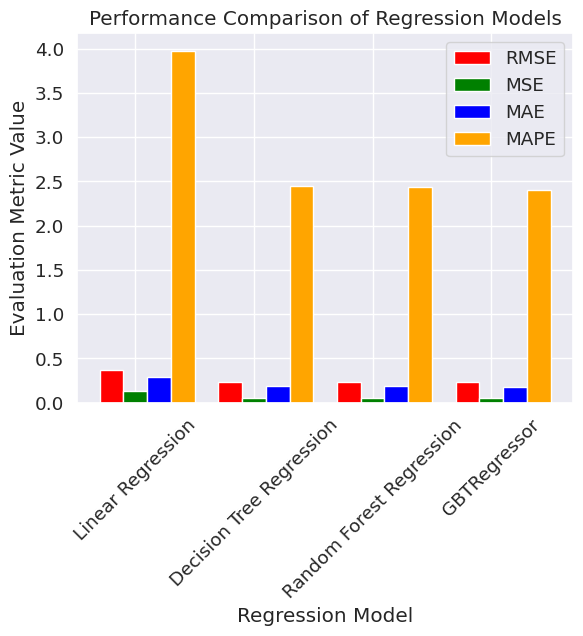

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of models
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'GBTRegressor']

# Create a list of evaluation metrics
metrics = ['RMSE', 'MSE', 'MAE', 'MAPE']

# Create a 2D array of the evaluation metric values for each model
values = np.array([[0.368, 0.136, 0.296, 3.977],
                   [0.234, 0.055, 0.185, 2.448],
                   [0.233, 0.054, 0.184, 2.440],
                   [0.229, 0.053, 0.181, 2.401]])

# Set the width of each bar
barWidth = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the bar chart
plt.bar(r1, values[:,0], color='red', width=barWidth, edgecolor='white', label=metrics[0])
plt.bar(r2, values[:,1], color='green', width=barWidth, edgecolor='white', label=metrics[1])
plt.bar(r3, values[:,2], color='blue', width=barWidth, edgecolor='white', label=metrics[2])
plt.bar(r4, values[:,3], color='orange', width=barWidth, edgecolor='white', label=metrics[3])

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(models))], models)

# Add axis labels and a title
plt.xlabel('Regression Model')
plt.ylabel('Evaluation Metric Value')
plt.title('Performance Comparison of Regression Models')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### When we compare all the four model, the above table gives us a clear analysis that every model has a good prediction. But comparatively Gradient Boosted Tree model gives us a good prediction. 

# 6.b) Residual Analysis

### The residual analysis should satisfy three assumptions


1.   The frequescy of the residuals should be normally distributed
2.   Homoscedasticity
3.   Independent



### For Linear Regression Model

In [ ]:
#Residual analysis
residuals = lr_predictions.select("log_price", "prediction").rdd.map(lambda x: x[0] - x[1]).collect()


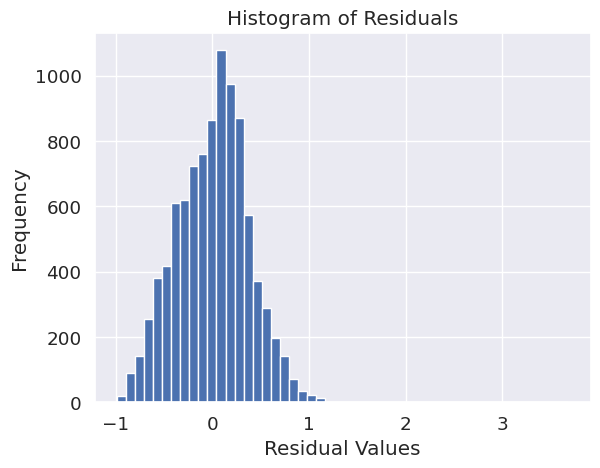

In [ ]:


plt.hist(residuals, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.show()


It satisfies the first condition and the frequency is normally distributed.

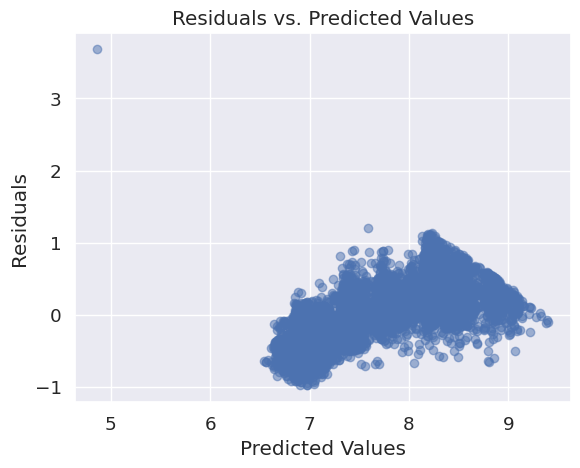

In [ ]:
plt.scatter(lr_predictions.select("prediction").rdd.map(lambda x: x[0]).collect(), residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


It is not completely satisfying the homoscedasticity, but we cannot see any pattern in the residual. Pattern in the data clues us the heteroscedasticity and independency of the Residual and predicted values.

### For Decision Tree Model

In [ ]:
#Residual analysis
residuals_dt = dt_predictions.select("log_price", "prediction").rdd.map(lambda x: x[0] - x[1]).collect()


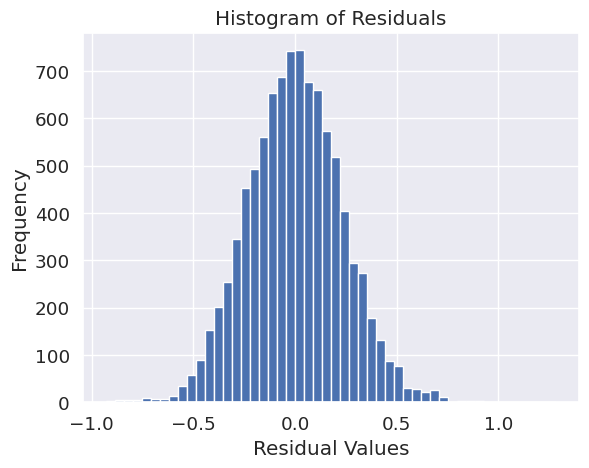

In [ ]:


plt.hist(residuals_dt, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.show()


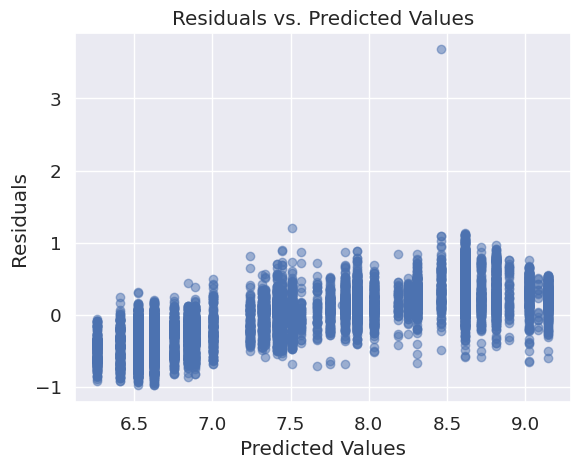

In [ ]:
plt.scatter(dt_predictions.select("prediction").rdd.map(lambda x: x[0]).collect(), residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


### For Random Forest Model

In [ ]:
#Residual analysis
residuals_rf = rf_predictions.select("log_price", "prediction").rdd.map(lambda x: x[0] - x[1]).collect()


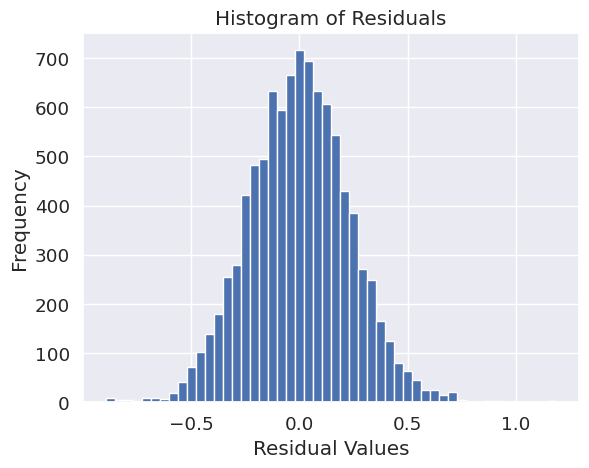

In [ ]:

plt.hist(residuals_rf, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.show()


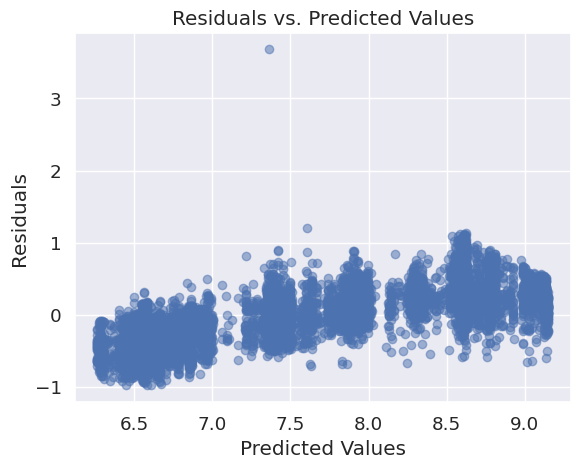

In [ ]:
plt.scatter(rf_predictions.select("prediction").rdd.map(lambda x: x[0]).collect(), residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


### For Gradient Boosted Tree Model

In [ ]:
#Residual analysis
residuals_gbt = gbt_predictions.select("log_price", "prediction").rdd.map(lambda x: x[0] - x[1]).collect()


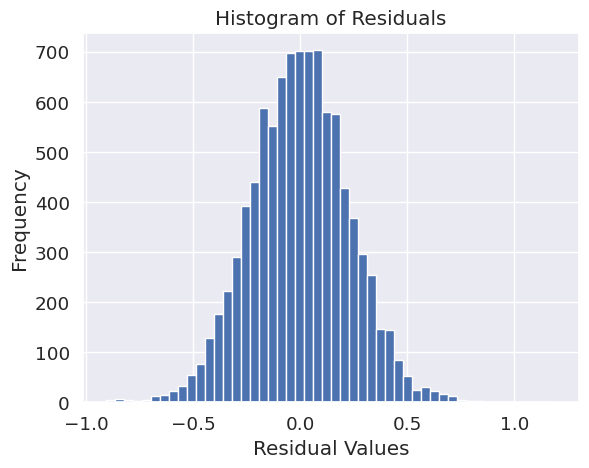

In [ ]:


plt.hist(residuals_gbt, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.show()


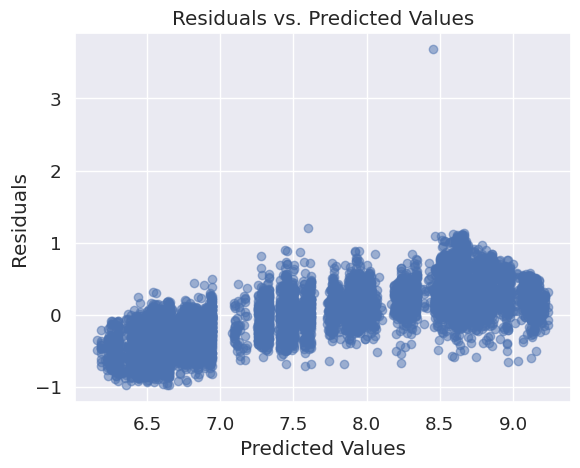

In [ ]:
plt.scatter(gbt_predictions.select("prediction").rdd.map(lambda x: x[0]).collect(), residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


## Conclusion:-
## From all the four models, we have done two validations. In both the validations Gradient Boosted Trees gave us good prediction. Therefor, I conclude that GBT regression's prediction is better among the four models.

In [60]:
%%shell
jupyter nbconvert --to html ///content/Price_Prediction_Diamonds (1).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html ///content/Price_Prediction_Diamonds (1).ipynb'


CalledProcessError: ignored